In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


In [ ]:
titanic_df = pd.read_csv('titanic.csv')

In [ ]:
print(titanic_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [ ]:
print(titanic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
print(titanic_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


2.Handle Missing Values

In [ ]:
titanic_df['Age'].fillna(titanic_df['Age'].median(),inplace=True)

/tmp/ipython-input-6-135694784.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].median(),inplace=True)


In [ ]:
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0],inplace=True)

/tmp/ipython-input-7-2204408024.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0],inplace=True)


In [ ]:
titanic_df.drop(columns=['Cabin'],inplace=True)

In [ ]:
titanic_df.dropna(subset=['Fare'],inplace=True)

3.Correct Data Types


In [ ]:
# titanic_df['Survived']=titanic_df['Survived'].astype('category') # Remove this line
titanic_df['Pclass']=titanic_df['Pclass'].astype('category')

In [ ]:
titanic_df['FamilySize']=titanic_df['SibSp']+titanic_df['Parch']+1

In [ ]:
titanic_df['IsAlone']=(titanic_df['FamilySize']==1).astype(int)

In [ ]:
titanic_df['Title']=titanic_df['Name'].str.extract('([A-Za-z]+)\.',expand=False)
titanic_df['Title']=titanic_df['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr',
                                                 'Major','Rev','Sir','Jonkheer','Dona'],'Rare')
titanic_df['Title']=titanic_df['Title'].replace('Mlle','Miss')
titanic_df['Title']=titanic_df['Title'].replace('Ms','Miss')
titanic_df['Title']=titanic_df['Title'].replace('Mme','Mrs')

# Convert 'Survived' to int before calculating the mean
titanic_df['Survived'] = titanic_df['Survived'].astype(int)

print(titanic_df[['Title','Survived']].groupby(['Title'],as_index=False).mean())

    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826


In [ ]:
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'], drop_first=True)

In [45]:
titanic_df['Sex'] = titanic_df['Sex'].map({'male':0,'female':1})

In [ ]:
titanic_df = pd.get_dummies(titanic_df, columns=['Title'], drop_first=True)

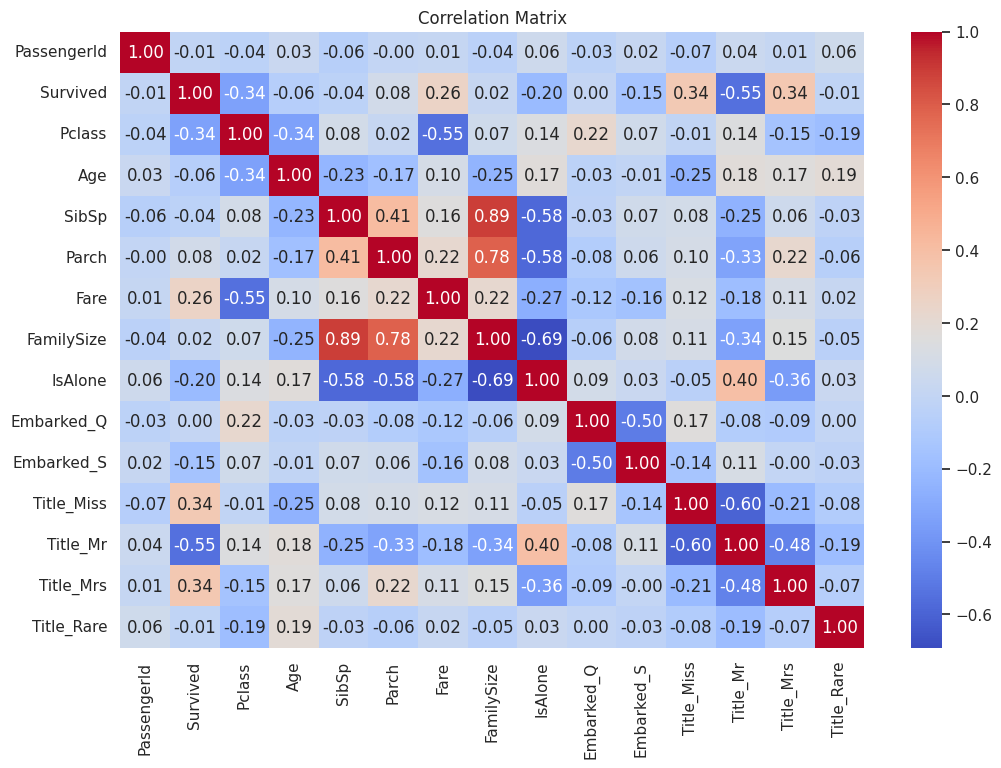

In [ ]:
# Drop non-numeric columns before calculating the correlation matrix
titanic_df_numeric = titanic_df.drop(columns=['Name', 'Sex', 'Ticket'])

correlation_matrix=titanic_df_numeric.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
features=['Pclass','Sex','Age','Fare','FamilySize','IsAlone',
           'Embarked_Q','Embarked_S','Title_Miss','Title_Mr',
          'Title_Mrs','Title_Rare']
X=titanic_df[features]
Y=titanic_df['Survived']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [41]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive/majorproject(source code)


In [47]:
!zip -r source_code.zip "/content/drive/MyDrive/majorproject(source code)"

updating: content/drive/MyDrive/majorproject(source code)/ (stored 0%)


In [39]:
from google.colab import files
files.download('source_code.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>